In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

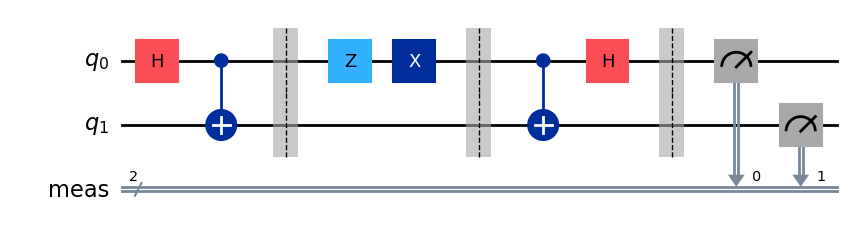

In [7]:
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.cx(0,1)

circuit.barrier()

match message:= '11': 
  case '00':
    circuit.id(0)
  case '01':
    circuit.z(0)
  case '10':
    circuit.x(0)
  case '11':
    circuit.z(0)
    circuit.x(0)

circuit.barrier()

# Barron decodes Olivia's message
circuit.cx(0, 1)
circuit.h(0)

# Barron measures the qubits to read Olivia's message
circuit.measure_all()
circuit.draw(output='mpl');

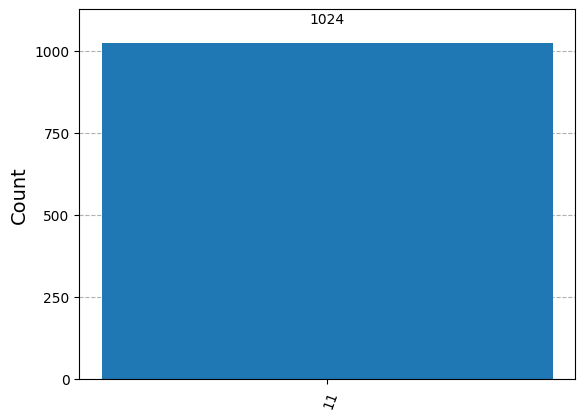

In [8]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts());